<a href="https://colab.research.google.com/github/Amulya-B28/Brain-Tumor-Detection/blob/master/BTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install tensorflow matplotlib scikit-learn


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile


In [3]:
# Upload and extract the dataset
from google.colab import files
uploaded = files.upload()

with ZipFile("btd.zip", 'r') as zip_ref:
    zip_ref.extractall("./data")


Saving btd.zip to btd.zip


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = './data/btd/CleandMRIImageData/Train'
val_dir = './data/btd/CleandMRIImageData/Test'  # Assuming the dataset has a validation folder

# ImageDataGenerator for data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Input size for VGG16
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 216 images belonging to 4 classes.
Found 45 images belonging to 4 classes.


In [5]:
from tensorflow.keras.applications import VGG16  # Import VGG16 here
from tensorflow.keras.models import Sequential  # This line imports the Sequential class
import tensorflow as tf  # Make sure to import TensorFlow
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile

# Load VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = Sequential([  # Now 'Sequential' is defined and can be used
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    train_data,
    epochs=1,
    validation_data=val_data
)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 158s 23s/step - accuracy: 0.2916 - loss: 1.5544 - val_accuracy: 0.2222 - val_loss: 1.4070


In [8]:
# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_finetune = model.fit(
    train_data,
    epochs=3,
    validation_data=val_data
)


Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 184s 26s/step - accuracy: 0.3215 - loss: 1.3770 - val_accuracy: 0.5111 - val_loss: 1.1808
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 202s 27s/step - accuracy: 0.4531 - loss: 1.2275 - val_accuracy: 0.7778 - val_loss: 0.8472
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 201s 26s/step - accuracy: 0.7129 - loss: 0.8446 - val_accuracy: 0.9333 - val_loss: 0.5376


Saving Te-no_0025.jpg to Te-no_0025.jpg


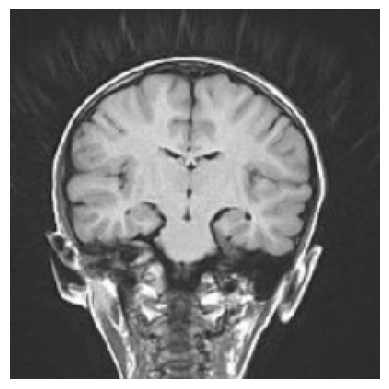

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
Predicted Class: notumor


In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Upload a test image
uploaded = files.upload()

# Get the uploaded image path
img_path = list(uploaded.keys())[0]

# Preprocess the uploaded image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to the model's input size
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

# Make prediction
prediction = model.predict(img_array)

# Get class labels
classes = list(train_data.class_indices.keys())
predicted_class = classes[np.argmax(prediction)]

print("Predicted Class:", predicted_class)
